In [1]:
#All code present was constructed by and is the explicit property of Kerry Hall.
#Data belongs to Carah Watson, Emily Rhoades, Heidi Curtis, Kishan Raval, Julianne Faucett, and Kerry Hall
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pandas import DataFrame as df
import numpy as np

In [2]:
exp1 = {
    "Increasing Flowrate" :{
        "Flow" : np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5]),
        "Pressure Drop" : np.array([2.7, 3.8, 4.9, 5.8, 7.1, 8.2, 9, 10.4, 11.7, 12.7, 13.9, 14.1, 13.9, 13.85, 13.9, 14, 14.15]),
    },
    "Decreasing Flowrate" :{
        "Flow" : np.flip(np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5])),
        "Pressure Drop" : np.array([14.15, 14, 14, 13.9, 13.9, 13.75, 13, 12.2, 11.2, 10.2, 9, 8.05, 6.9, 5.8, 4.9, 3.8, 2.75]),
    },
 }
print("\nQ is constant (0).\n")
df.from_dict(exp1)


Q is constant (0).



,Increasing Flowrate,Decreasing Flowrate
Flow,"[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2...","[4.5, 4.25, 4.0, 3.75, 3.5, 3.25, 3.0, 2.75, 2..."
Pressure Drop,"[2.7, 3.8, 4.9, 5.8, 7.1, 8.2, 9.0, 10.4, 11.7...","[14.15, 14.0, 14.0, 13.9, 13.9, 13.75, 13.0, 1..."


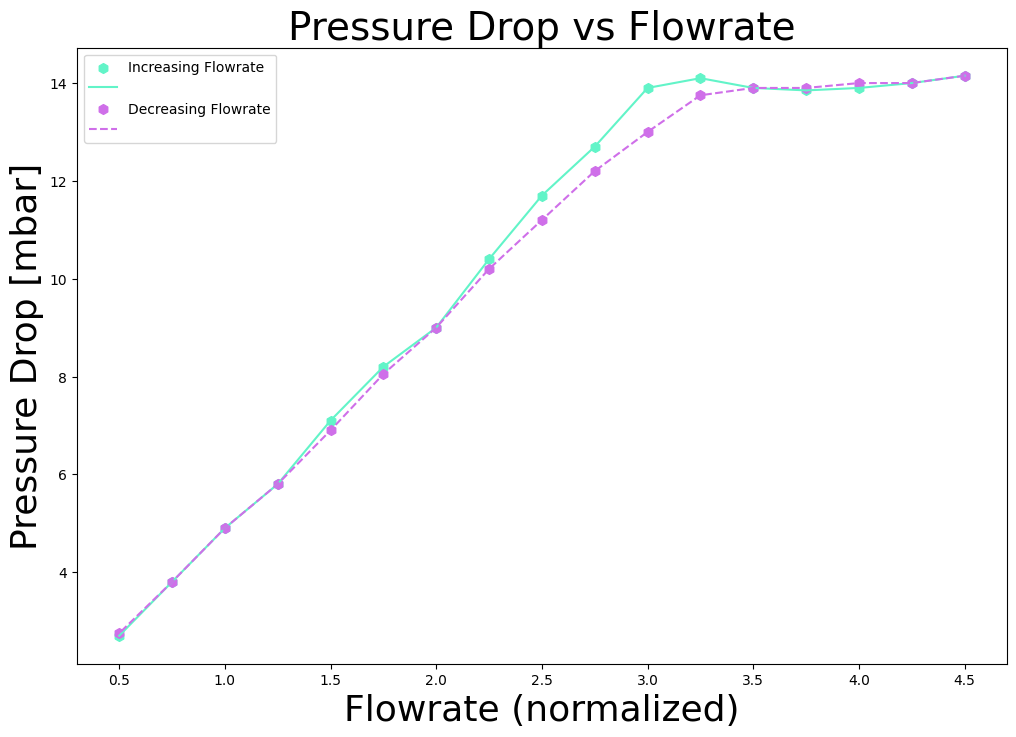

In [3]:
fig, ax = plt.subplots(figsize=(12,8),)

color_list = ["#62f4c8", '#cf6fe9']
line_styles = ["solid", "dashed"]
for each, color, lns in zip(exp1, color_list, line_styles): 
    x = exp1.get(each).get("Flow")
    y = exp1.get(each).get("Pressure Drop")
    
    ax.scatter(x, y, marker="h", s=50, c=color, label=each,)
    ax.plot(x, y, c=color, linewidth=1.5, label=" ", linestyle=lns)
    
ax.legend()
plt.title("Pressure Drop vs Flowrate", fontsize=28)
ax.set_ylabel("Pressure Drop [mbar]", fontsize=26)
ax.set_xlabel("Flowrate (normalized)", fontsize=26)
plt.show()

In [4]:
exp2 = {
    "Bed Height" : np.array([0, 6, 17, 24, 34, 47, 58, 69, 73]),
    "Pressure Drop" : np.array([13.3, 12.8, 10.7, 9.3, 7.4, 5.1, 3.1, 1, 0.5]),
     "Sensor Height" : np.array([20, 26, 37, 44, 54, 67, 78, 89, 93]),
}
print("\nThe flowrate is constant (3, normalized flow).\n")
df.from_dict(exp2)


The flowrate is constant (3, normalized flow).



,Bed Height,Pressure Drop,Sensor Height
0,0,13.3,20
1,6,12.8,26
2,17,10.7,37
3,24,9.3,44
4,34,7.4,54
5,47,5.1,67
6,58,3.1,78
7,69,1.0,89
8,73,0.5,93


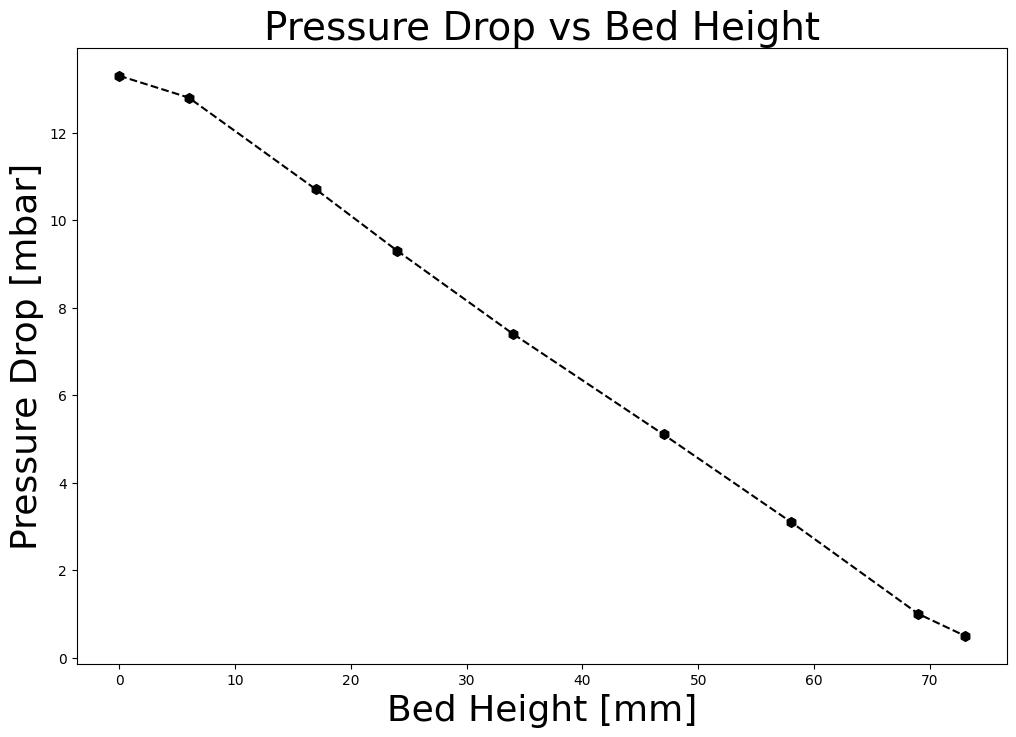

In [5]:
fig, ax = plt.subplots(figsize=(12,8),)

x = exp2.get("Bed Height")
y = exp2.get("Pressure Drop")
ax.scatter(x, y, marker="h", s=50, c="black", label=each,)
ax.plot(x, y, c="black", linewidth=1.5, label=" ", linestyle=lns)

plt.title("Pressure Drop vs Bed Height", fontsize=28)
ax.set_ylabel("Pressure Drop [mbar]", fontsize=26)
ax.set_xlabel("Bed Height [mm]", fontsize=26)
plt.show()

In [6]:
exp3 = {
    "Flowrate" : np.array([1, 1.5, 2.5, 3, 3.5,]),
    "Heater Temperature" : np.array([ 195, 195, 163, 153, 135,]),
    "Bed Temperature" : np.array([ 21, 21, 22, 26, 27]),
}
print("\nThe heater height from base is 25\n\nThe heater power is 30.4W\n")
df.from_dict(exp3)


The heater height from base is 25

The heater power is 30.4W



,Flowrate,Heater Temperature,Bed Temperature
0,1.0,195,21
1,1.5,195,21
2,2.5,163,22
3,3.0,153,26
4,3.5,135,27


[130.87089414 130.87089414 161.50025234 179.30342977 210.84755167]


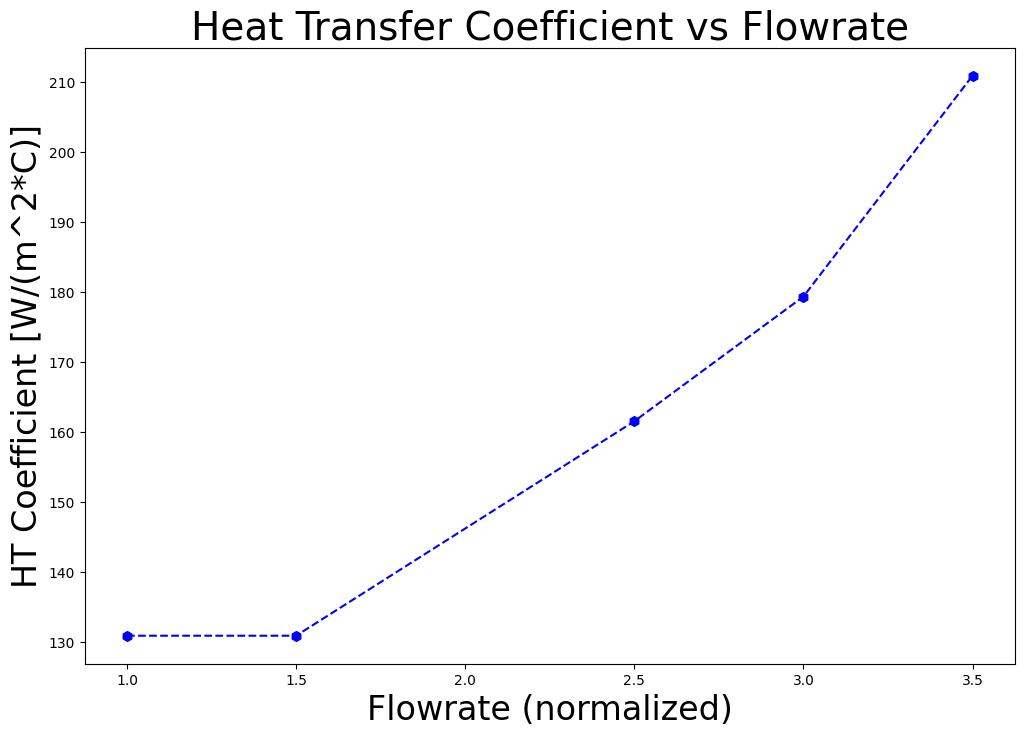

In [7]:
#This relationship assumes exclusive HT to the bed.
def HT_coeff(T1, T2, P=30.4, Aheater=1.335*10**(-3)): return P/((T1-T2)*Aheater) # Area in m^2 and P in watts

fig, ax = plt.subplots(figsize=(12,8),)

T1 = exp3.get("Heater Temperature")
T2 = exp3.get("Bed Temperature")
x = exp3.get("Flowrate")
y = HT_coeff(T1, T2)
print(y)
ax.scatter(x, y, marker="h", s=50, c="blue", label=each,)
ax.plot(x, y, c="blue", linewidth=1.5, label=" ", linestyle=lns)

plt.title("Heat Transfer Coefficient vs Flowrate", fontsize=28)
ax.set_ylabel("HT Coefficient [W/(m^2*C)]", fontsize=24)
ax.set_xlabel("Flowrate (normalized)", fontsize=24)
plt.show()

The expected relationships were almost shown perfectly with the graphs above. The overshoot can be visualized during the ramp up of experiment 1. The nearly linear relationship between bed height and pressure is shown for experiment 2. Experiment 3's graph is a bit more dicey with respect to the expected relationship. The initial portion is consistent but the latter portion does not display the expected hump. This could possibly be because the flowrate needed for this was not reached. These experiments could be improved by repeating them with different packings and attempting to acquire the described relationship of experiment 3. 